In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

C:\Users\annar\AppData\Local\Temp\ipykernel_11524\3645511458.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data\Claims-n-Patients.csv")
df.columns

Index(['claim id', 'claim date', 'claim line item', 'claim status',
       'primary plan payment type', 'secondary plan payment type',
       'tertiary plan payment type', 'primary plan name',
       'secondary plan name', 'tertiary plan name', 'primary plan type',
       'secondary plan type', 'tertiary plan type', 'reject code',
       'reject reason', 'source claim type', 'referring provider hcp id',
       'rendering provider hcp id', 'diagnosis code 1', 'diagnosis code 2',
       'diagnosis code 3', 'diagnosis code 4', 'diagnosis code 5',
       'diagnosis code 6', 'diagnosis code 7', 'diagnosis code 8', 'ptnt oop',
       'buy down', 'paid by payer', 'service bill amount',
       'service allowed amount', 'out of pocket ask',
       'primary payer pay amount', 'secondary payer pay amount',
       'tertiary payer pay amount', 'product strength',
       'procedure description', 'procedure code', 'treatment code',
       'treatment description', 'days supply', 'quantity', 'patient i

In [3]:
#common drugs in both datasets
drugs = ['66711', '66761', '66762', '66821', '67027', '67028', '67031',
       '67039', '67040', '67105', '67108', '67145', '67210', '67220',
       '67228', '0017T', 'C9093', 'C9097', 'C9291', 'C9399', 'J0178',
       'J0179', 'J1100', 'J2503', 'J2777', 'J2778', 'J2779', 'J3300',
       'J3301', 'J3395', 'J3396', 'J3490', 'J3590', 'J7312', 'J9035',
       'Q2046', 'Q5124', 'Q5128']

In [4]:

# Filter DataFrame to keep only rows with values in the list
filtered_df = df[df['procedure code'].isin(drugs)]
filtered_df.head()


claim id  claim date  claim line item claim status  \
0     41439  2018-12-27                1                
1     98850  2021-09-02                1                
2     74412  2018-03-15                3                
3     28608  2019-04-13                1                
4     28608  2019-04-13                4                

  primary plan payment type secondary plan payment type  \
0                  Medicare                               
1                Commercial                               
2                  Medicare                               
3           Medicare Part D                               
4           Medicare Part D                               

  tertiary plan payment type                 primary plan name  \
0                                       MEDICARE MARYLAND (MD)   
1                                  UNITED HLTHCARE-UNSPECIFIED   
2                             MEDICARE B CALIFORNIA SOUTH (CA)   
3                                     UHC MED ADV GENERAL (NJ)   
4                                     UHC MED ADV GENERAL (NJ)   

  secondary plan name tertiary plan name  ... procedure code treatment code  \
0                                         ...          J0178          J0178   
1                                         ...          J0178          J0178   
2                                         ...          C9399          C9399   
3                                         ...          C9291          C9291   
4                                         ...          C9097          C9097   

                               treatment description days supply quantity  \
0             RADIOLOGIC EXAMINATION, CHEST; 2 VIEWS                        
1  HOSPITAL BED, SEMI-ELECTRIC (HEAD AND FOOT ADJ...                        
2  PARING OR CUTTING OF BENIGN HYPERKERATOTIC LES...                        
3  OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...                        
4          INJECTION, CEFTRIAXONE SODIUM, PER 250 MG                        

   patient id patient year of birth patient gender source value product id  \
0  1022234340                  1973                           M              
1  1004662074                  1949                           F              
2  1025020871                     0                           F              
3  1027263161                  1941                           F              
4  1027263161                  1941                           F  409733801   

         product name  
0                      
1                      
2                      
3                      
4  CEFTRIAXONE SODIUM  

[5 rows x 47 columns]

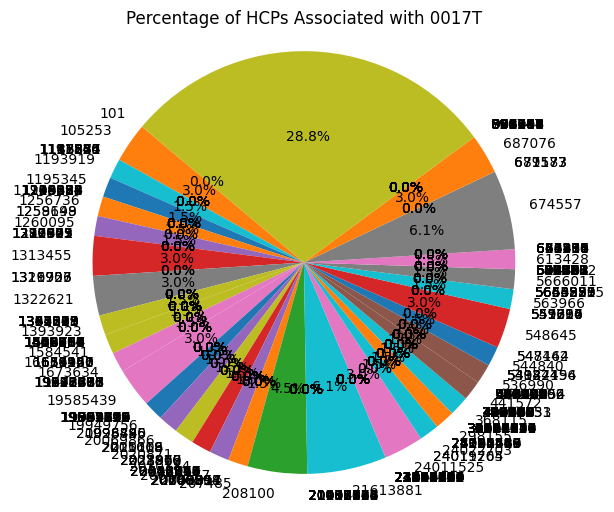

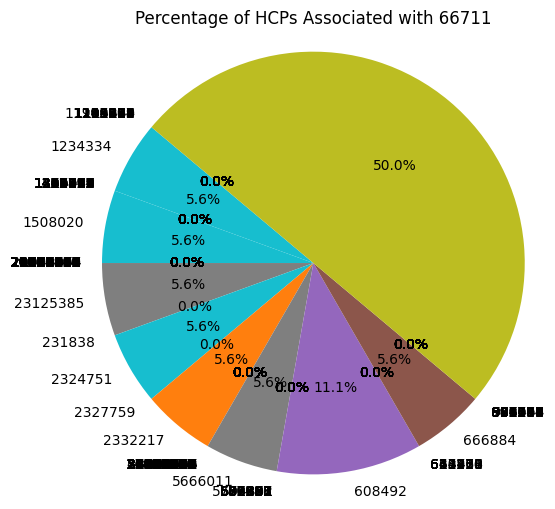

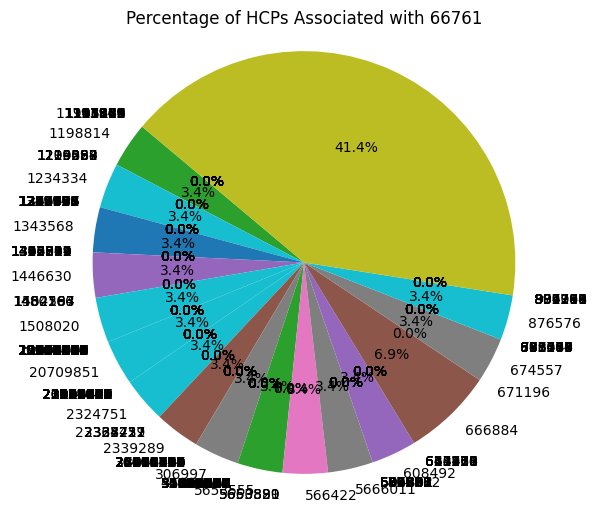

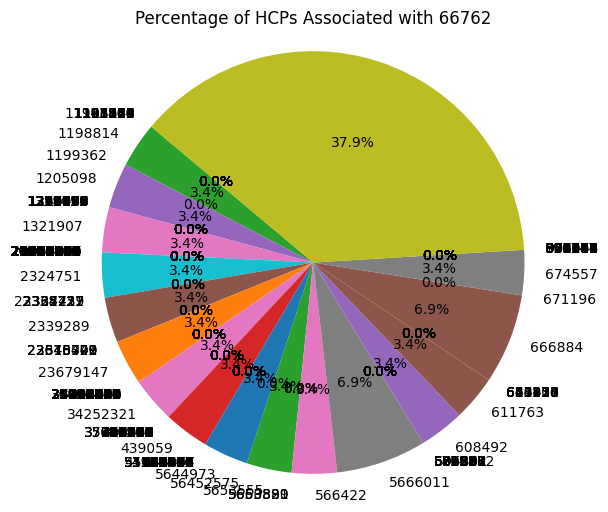

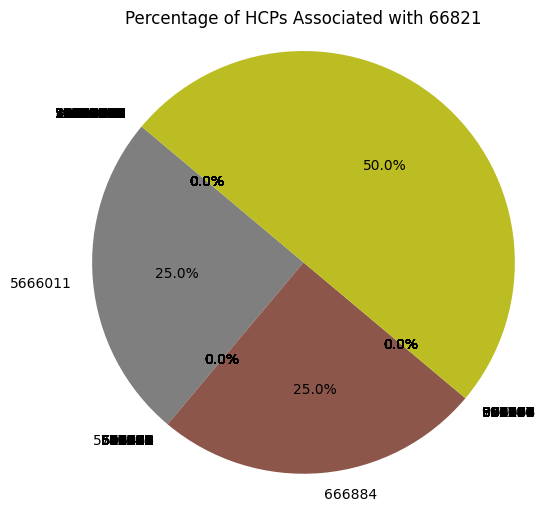

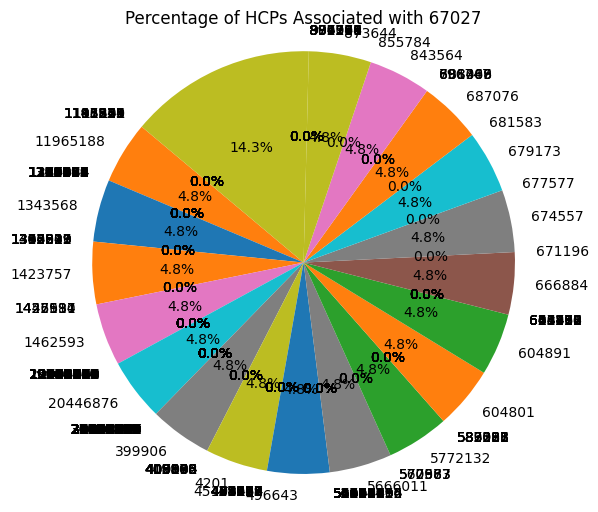

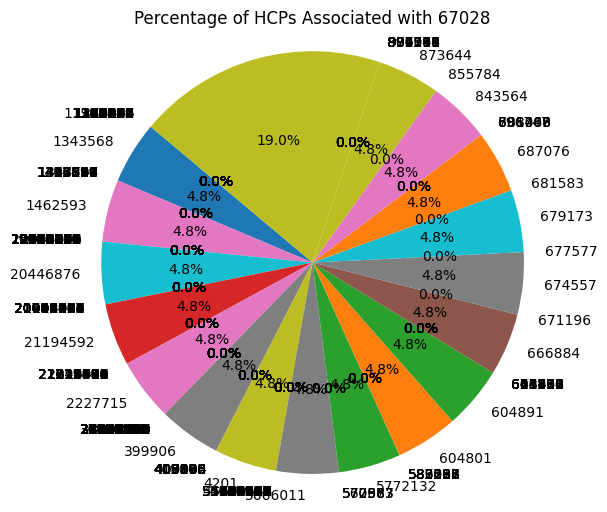

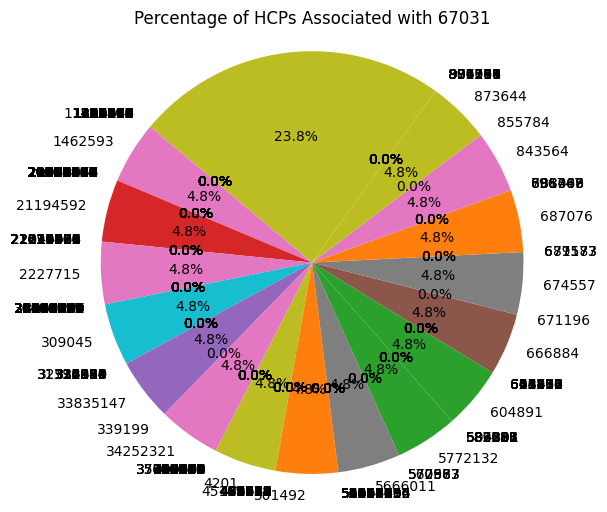

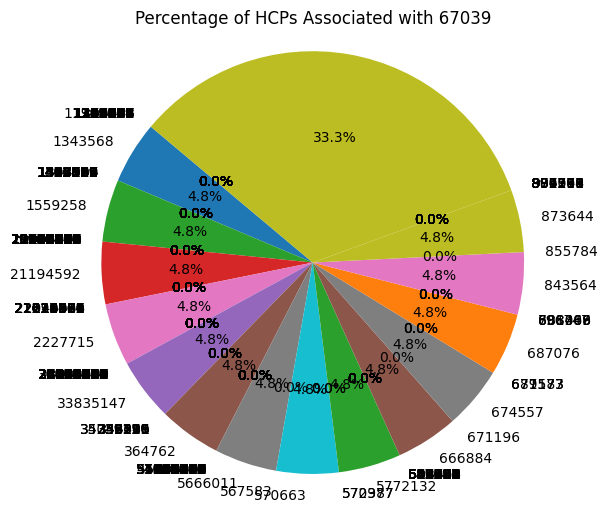

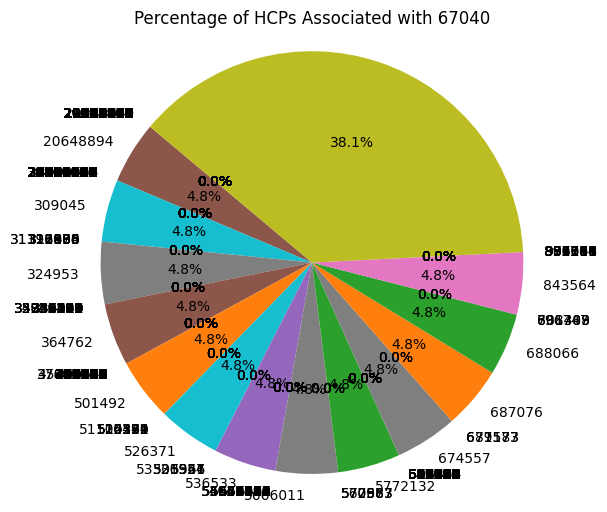

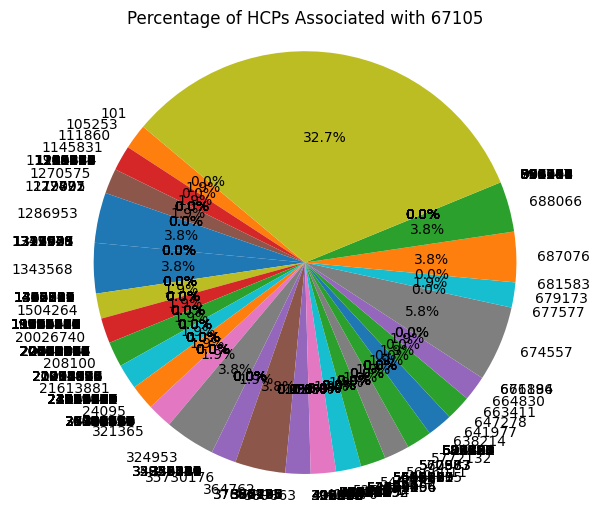

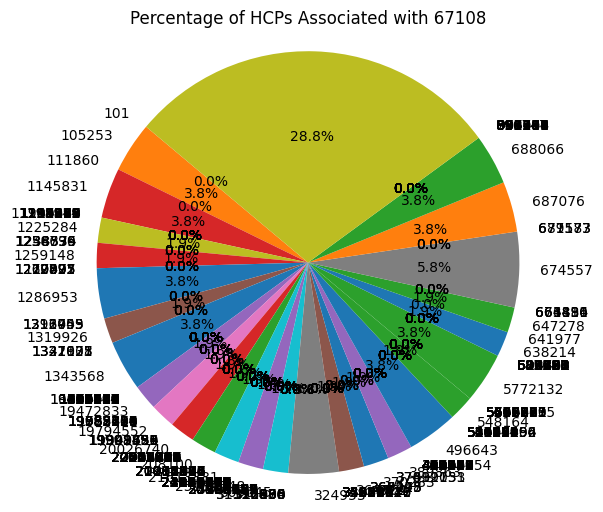

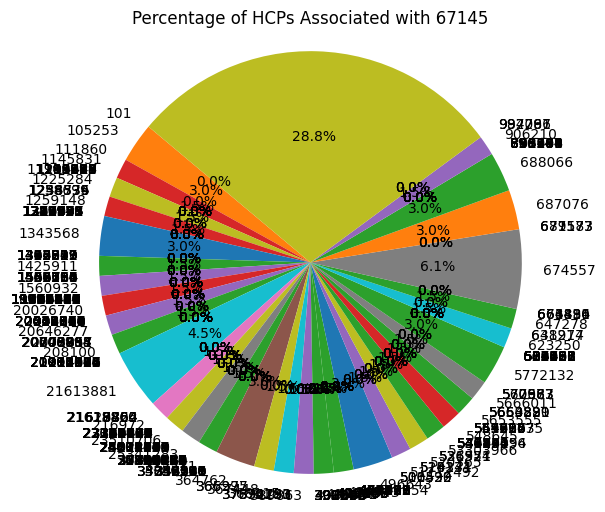

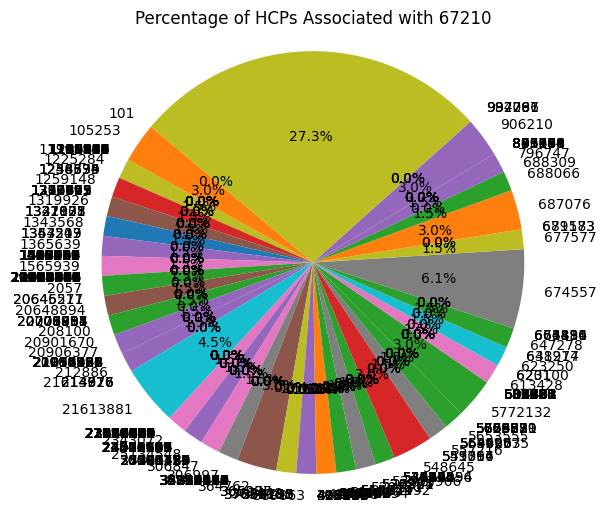

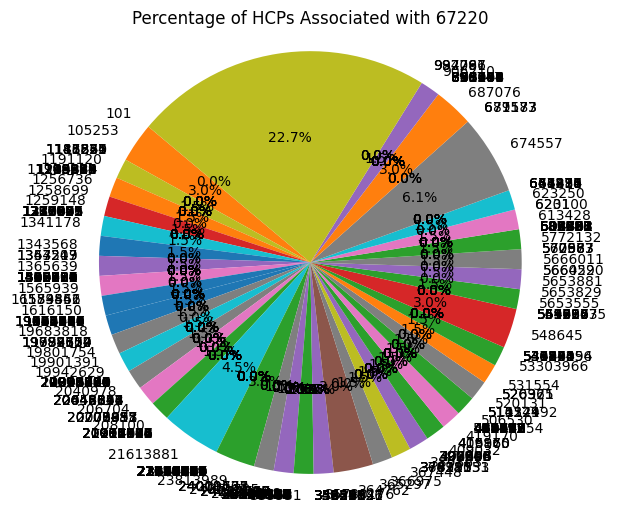

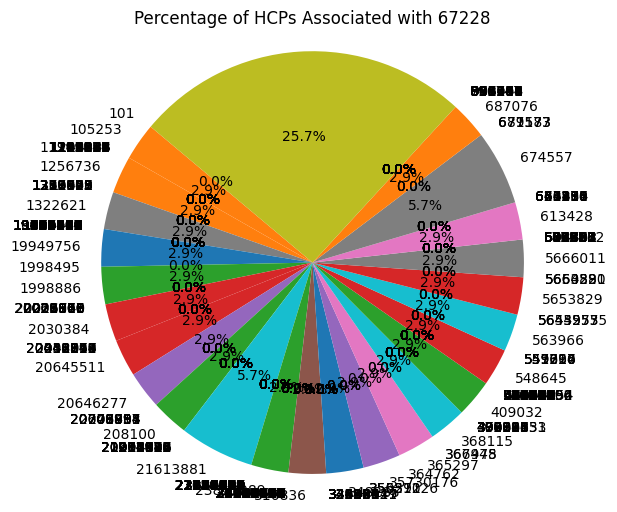

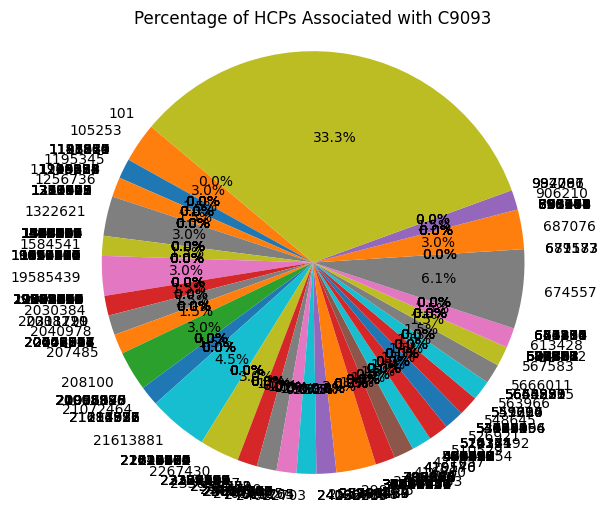

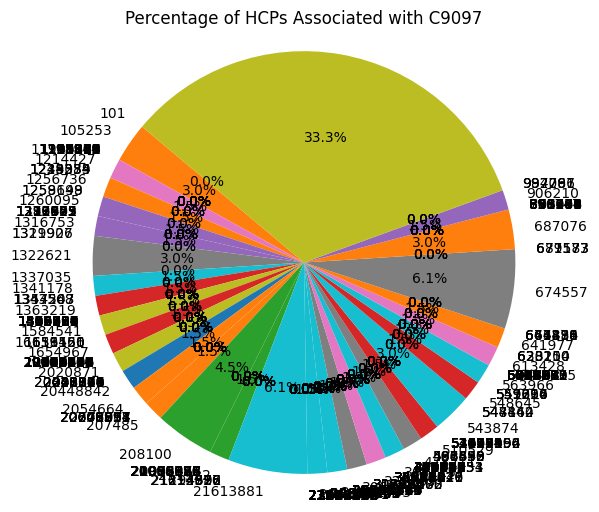

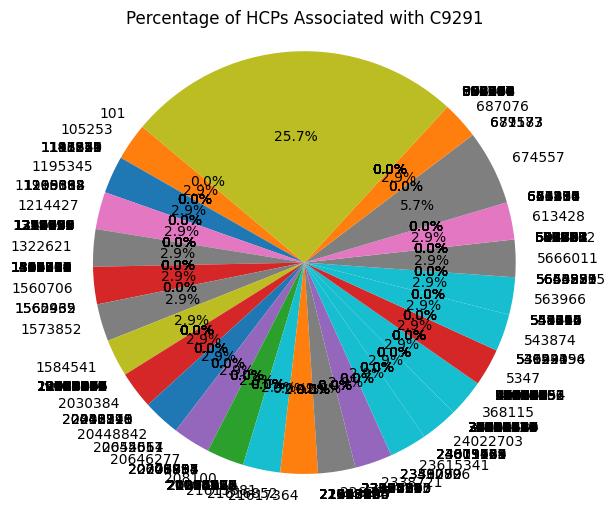

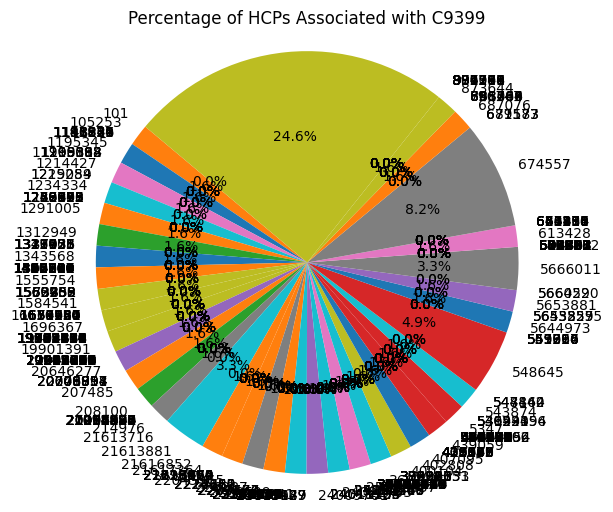

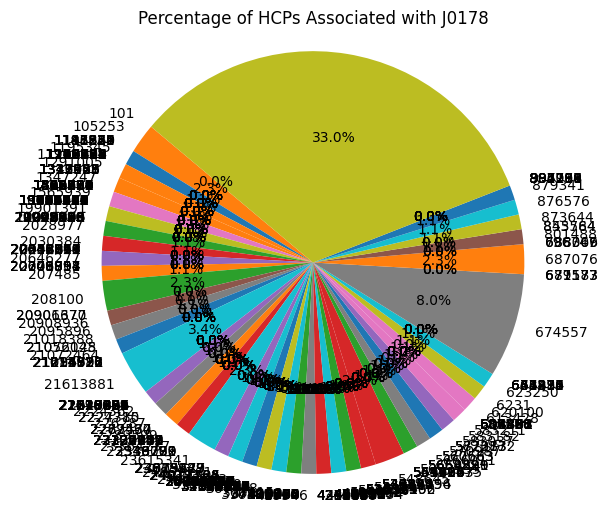

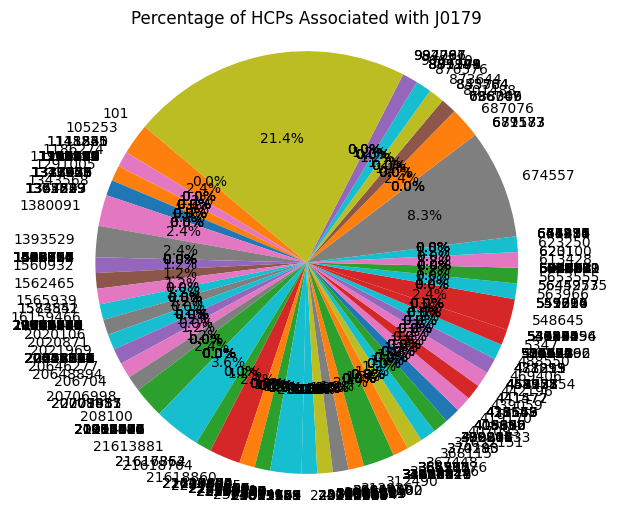

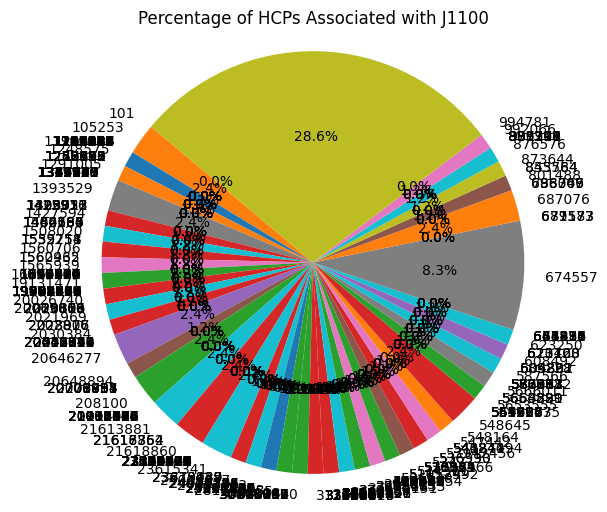

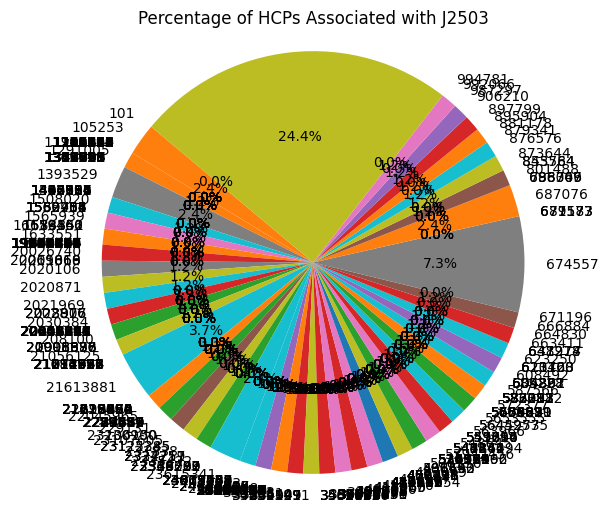

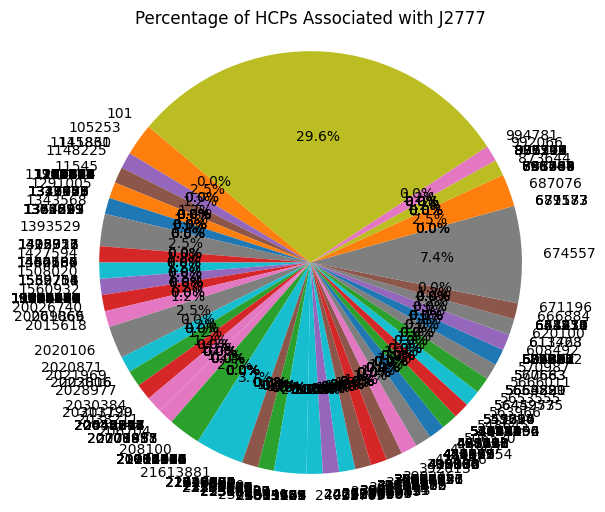

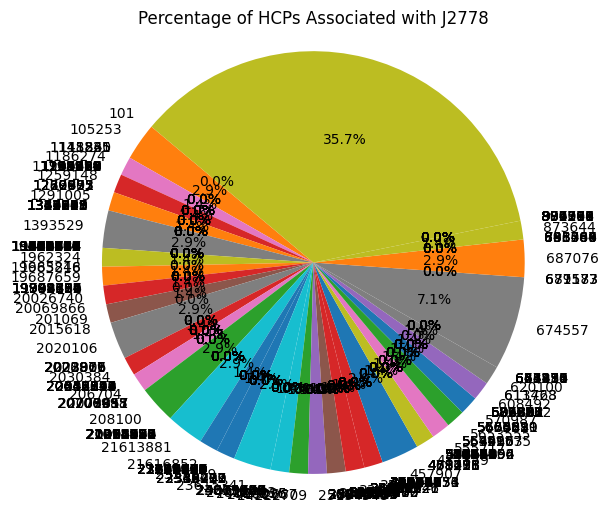

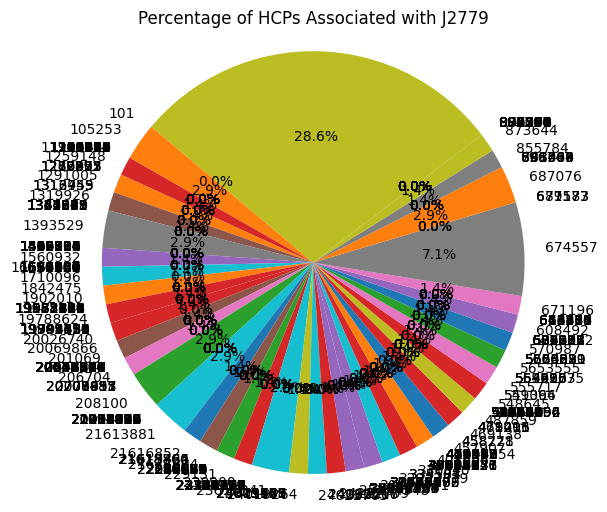

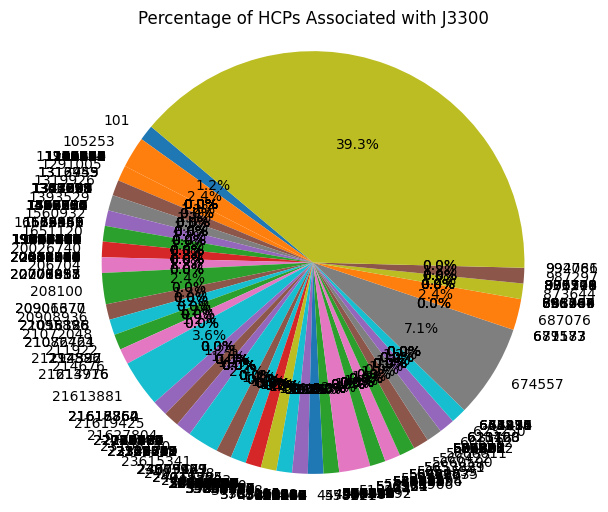

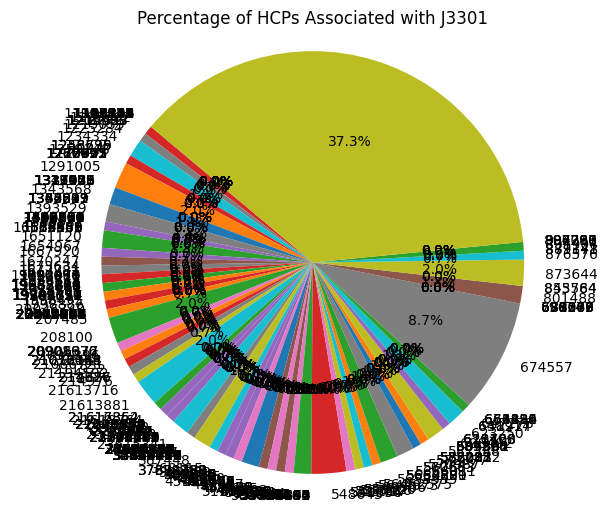

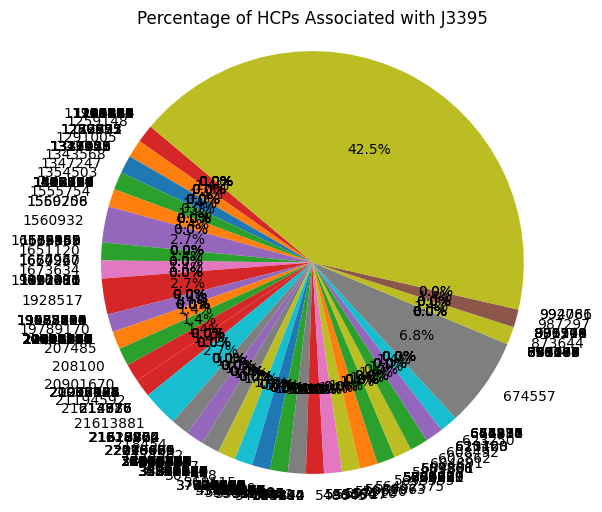

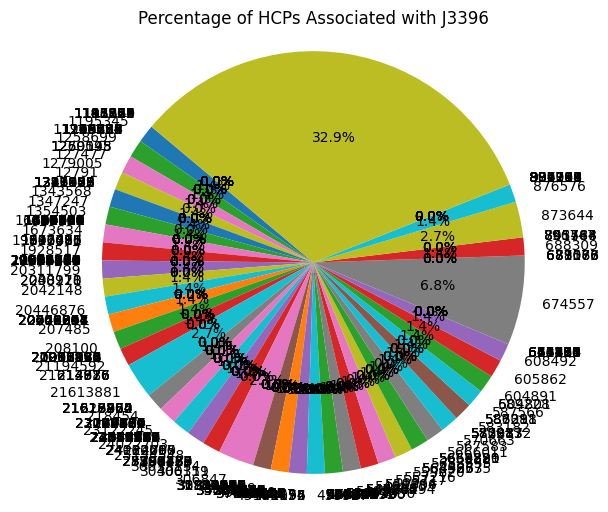

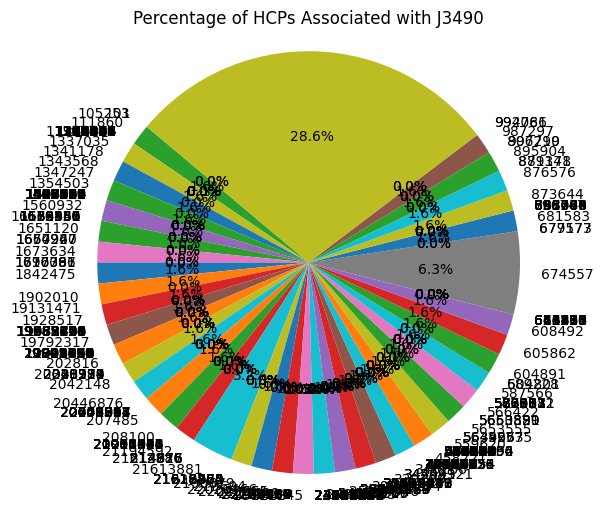

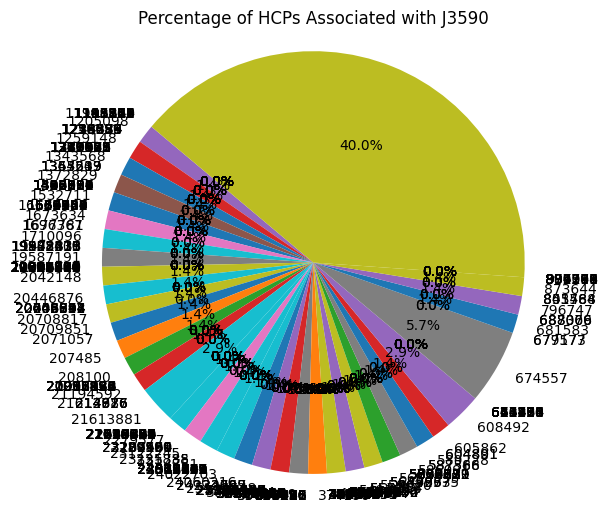

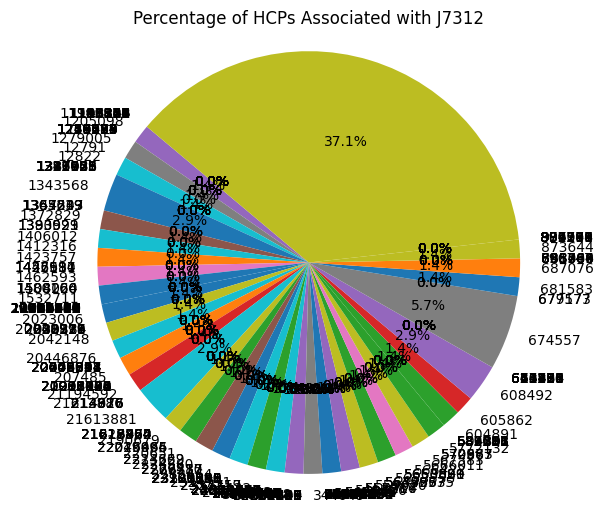

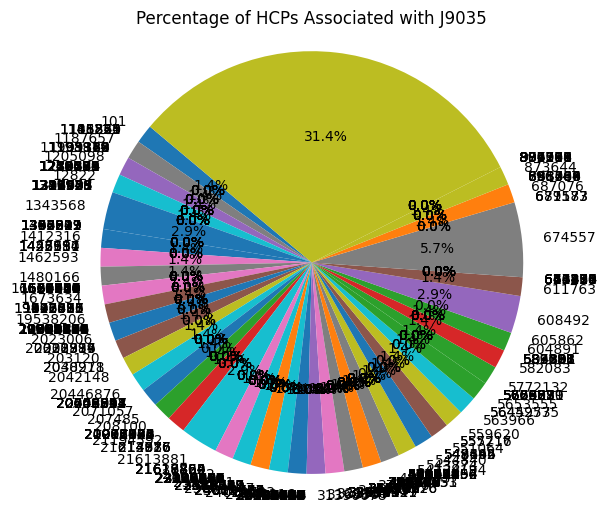

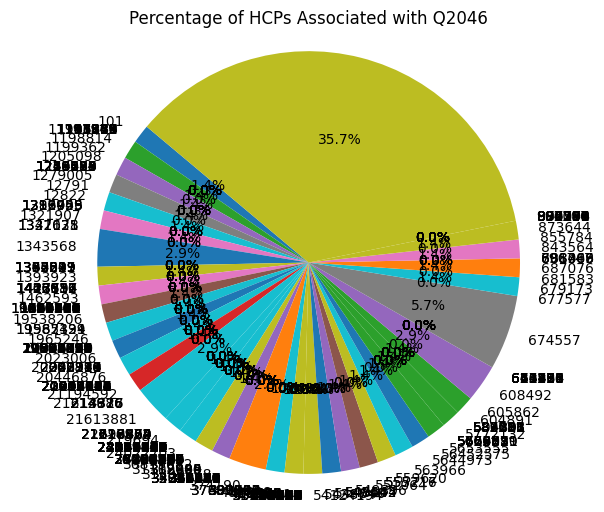

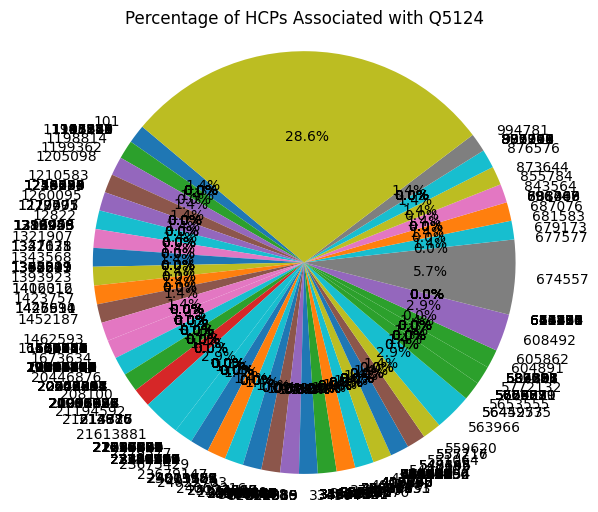

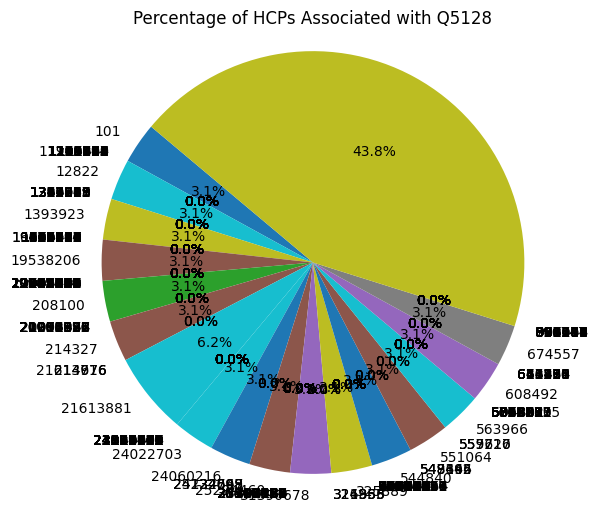

In [6]:
# Count occurrences of each combination of Product ID and HCP ID
counts = filtered_df.groupby(['procedure code', 'rendering provider hcp id']).size().reset_index(name='Count')

# Calculate the percentage of each HCP ID associated with each Product ID
hcp_percentage = counts.pivot(index='procedure code', columns='rendering provider hcp id', values='Count').fillna(0)
hcp_percentage = hcp_percentage.div(hcp_percentage.sum(axis=1), axis=0) * 100

# Plot pie charts for each Product ID
for product_id, percentages in hcp_percentage.iterrows():
    plt.figure(figsize=(6, 6))
    plt.pie(percentages, labels=hcp_percentage.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Percentage of HCPs Associated with {product_id}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()